# Mô tả dữ liệu, vẽ đồ thị dữ liệu

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

In [2]:
columns = ['wkc','wkr','wrc','wrr','bkc','bkr','moves']
data = pd.read_csv('krkopt.data',names=columns,header=None)

In [3]:
#Số cột, số dòng
data.shape

(28056, 7)

In [4]:
data.head()

,wkc,wkr,wrc,wrr,bkc,bkr,moves
0,a,1,b,3,c,2,draw
1,a,1,c,1,c,2,draw
2,a,1,c,1,d,1,draw
3,a,1,c,1,d,2,draw
4,a,1,c,2,c,1,draw


In [5]:
#Thông tin dữ liệu
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28056 entries, 0 to 28055
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   wkc     28056 non-null  object
 1   wkr     28056 non-null  int64 
 2   wrc     28056 non-null  object
 3   wrr     28056 non-null  int64 
 4   bkc     28056 non-null  object
 5   bkr     28056 non-null  int64 
 6   moves   28056 non-null  object
dtypes: int64(3), object(4)
memory usage: 1.5+ MB


In [6]:
#Giá trị bị mất
data.isna().sum()

wkc      0
wkr      0
wrc      0
wrr      0
bkc      0
bkr      0
moves    0
dtype: int64

In [7]:
#Phân tích thống kê
data.describe().T

,count,mean,std,min,25%,50%,75%,max
wkr,28056.0,1.854006,0.926414,1.0,1.0,2.0,2.0,4.0
wrr,28056.0,4.512404,2.282723,1.0,3.0,5.0,6.0,8.0
bkr,28056.0,4.451811,2.248387,1.0,3.0,4.0,6.0,8.0


In [8]:
#chuẩn hóa về số
encoder = LabelEncoder()

columns = list(data.select_dtypes('object').columns)
for col in columns:
    data[col] = encoder.fit_transform(data[col])
data.head()

,wkc,wkr,wrc,wrr,bkc,bkr,moves
0,0,1,1,3,2,2,0
1,0,1,2,1,2,2,0
2,0,1,2,1,3,1,0
3,0,1,2,1,3,2,0
4,0,1,2,2,2,1,0


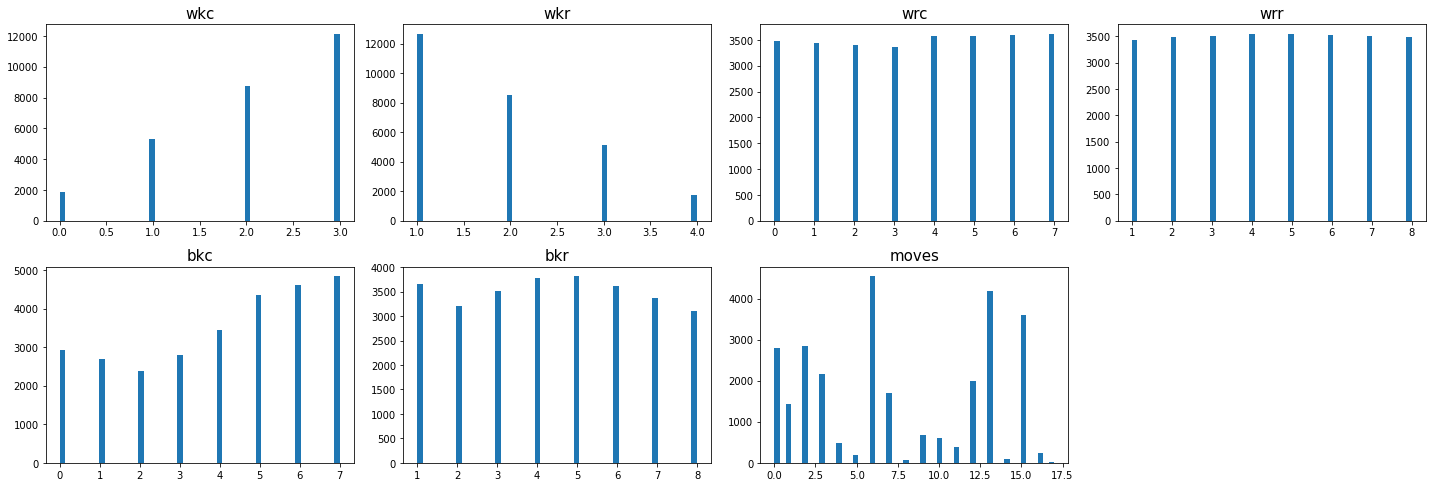

In [9]:
#Sự phân phối của các thuộc tính

i=1
plt.figure(figsize=(20,10))

for col in data.columns:
    plt.subplot(3,4,i)
    plt.hist(data[col],bins=50)
    plt.tight_layout()
    plt.title(col,fontsize=15)
    i+=1

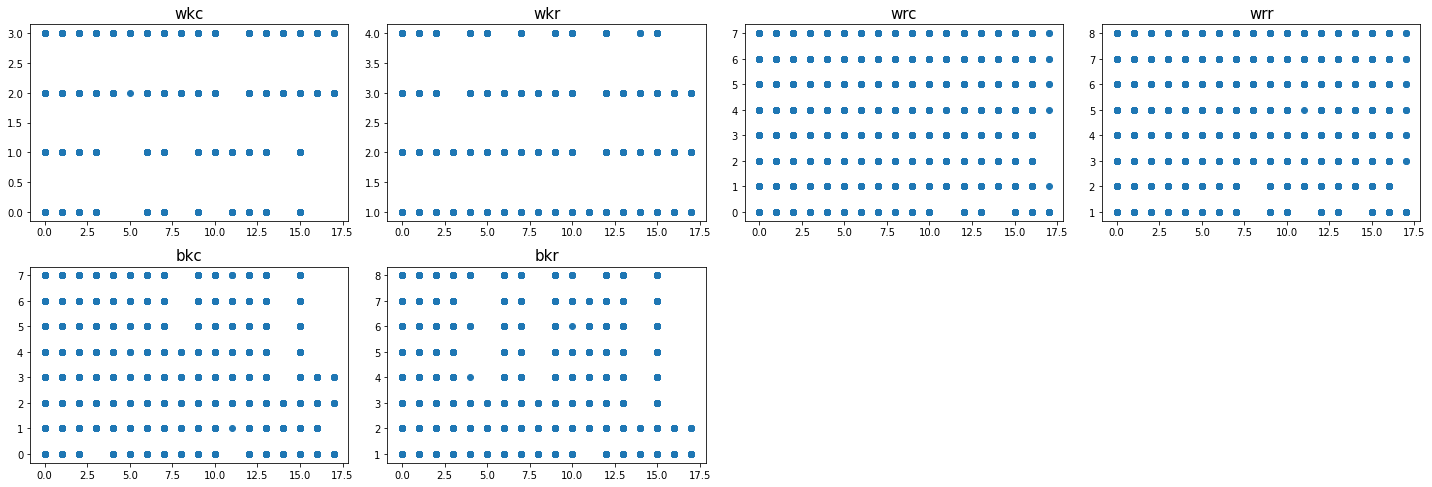

In [10]:
#Mối quan hệ giữa 6 thuộc tính đầu với thuộc tính cuối cùng

i=1
plt.figure(figsize=(20,10))

for col in data.drop(columns='moves').columns:
    plt.subplot(3,4,i)
    plt.scatter(data['moves'],data[col])
    plt.tight_layout()
    plt.title(col,fontsize=15)
    i+=1

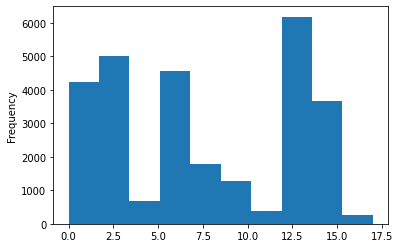

In [11]:
#Tập dữ liệu mất cân bằng cao
data['moves'].plot(kind='hist')

# Xử lý dữ liệu trước khi đưa vào mô hình

In [12]:
X = data.values[:, :-1]
Y = data.values[:, -1]

from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
X = minmax.fit_transform(X)
print(X[:5])
print(Y[:5])

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

print('Train:')
print(X_train.shape)
print(Y_train.shape)

print('Test:')
print(X_test.shape)
print(Y_test.shape)

[[0.         0.         0.14285714 0.28571429 0.28571429 0.14285714]
 [0.         0.         0.28571429 0.         0.28571429 0.14285714]
 [0.         0.         0.28571429 0.         0.42857143 0.        ]
 [0.         0.         0.28571429 0.         0.42857143 0.14285714]
 [0.         0.         0.28571429 0.14285714 0.28571429 0.        ]]
[0 0 0 0 0]
Train:
(19639, 6)
(19639,)
Test:
(8417, 6)
(8417,)


# Mô hình Naive Bayes

In [13]:
from sklearn.naive_bayes import CategoricalNB
model = CategoricalNB()
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)
print(y_pred)
print(Y_test)

[ 6  6 13 ... 13  6 15]
[16  6 13 ... 13  0  1]


In [14]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       820
           1       0.23      0.27      0.25       426
           2       0.22      0.09      0.13       884
           3       0.00      0.00      0.00       626
           4       0.00      0.00      0.00       147
           5       0.00      0.00      0.00        68
           6       0.19      0.77      0.31      1397
           7       0.38      0.02      0.04       522
           8       0.00      0.00      0.00        29
           9       0.00      0.00      0.00       192
          10       0.00      0.00      0.00       180
          11       0.00      0.00      0.00       118
          12       0.14      0.00      0.00       577
          13       0.20      0.21      0.20      1237
          14       0.00      0.00      0.00        26
          15       0.19      0.10      0.13      1082
          16       0.00      0.00      0.00        77
          17       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
#MultinomialNB
from sklearn.naive_bayes import MultinomialNB
model_NB = MultinomialNB()
model_NB.fit(X_train,Y_train)
y_pred = model_NB.predict(X_test)
print(y_pred)
print(Y_test)

[13  6  6 ...  6  6 13]
[16  6 13 ... 13  0  1]


In [16]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       820
           1       0.00      0.00      0.00       426
           2       0.00      0.00      0.00       884
           3       0.00      0.00      0.00       626
           4       0.00      0.00      0.00       147
           5       0.00      0.00      0.00        68
           6       0.28      0.78      0.42      1397
           7       0.00      0.00      0.00       522
           8       0.00      0.00      0.00        29
           9       0.00      0.00      0.00       192
          10       0.00      0.00      0.00       180
          11       0.00      0.00      0.00       118
          12       0.00      0.00      0.00       577
          13       0.20      0.52      0.29      1237
          14       0.00      0.00      0.00        26
          15       0.11      0.13      0.12      1082
          16       0.00      0.00      0.00        77
          17       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
#GaussianNB
from sklearn.naive_bayes import GaussianNB
model_NB = GaussianNB()
model_NB.fit(X_train,Y_train)
y_pred = model_NB.predict(X_test)
print(y_pred)
print(Y_test)

[ 8 11 11 ... 11  6 15]
[16  6 13 ... 13  0  1]


In [18]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.10      0.03      0.04       820
           1       0.24      0.47      0.32       426
           2       0.29      0.17      0.21       884
           3       0.00      0.00      0.00       626
           4       0.07      0.08      0.08       147
           5       0.18      0.85      0.30        68
           6       0.37      0.40      0.38      1397
           7       0.43      0.06      0.11       522
           8       0.11      0.07      0.09        29
           9       0.00      0.00      0.00       192
          10       0.37      0.21      0.27       180
          11       0.06      1.00      0.11       118
          12       0.33      0.01      0.02       577
          13       0.31      0.45      0.37      1237
          14       0.10      0.08      0.09        26
          15       0.36      0.24      0.29      1082
          16       0.53      0.61      0.57        77
          17       1.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
#ComplementNB
from sklearn.naive_bayes import ComplementNB
model_NB = ComplementNB()
model_NB.fit(X_train,Y_train)
y_pred = model_NB.predict(X_test)
print(y_pred)
print(Y_test)

[ 4  6  6 ...  6  6 13]
[16  6 13 ... 13  0  1]


In [20]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.07      0.00      0.01       820
           1       0.15      0.71      0.25       426
           2       0.20      0.15      0.17       884
           3       0.09      0.12      0.10       626
           4       0.13      0.15      0.14       147
           5       0.00      0.00      0.00        68
           6       0.29      0.74      0.42      1397
           7       0.10      0.11      0.11       522
           8       0.00      0.00      0.00        29
           9       0.00      0.00      0.00       192
          10       0.00      0.00      0.00       180
          11       0.00      0.00      0.00       118
          12       0.15      0.02      0.04       577
          13       0.39      0.14      0.21      1237
          14       0.00      0.00      0.00        26
          15       0.21      0.02      0.04      1082
          16       0.00      0.00      0.00        77
          17       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
#BernoulliNB
from sklearn.naive_bayes import BernoulliNB
model_NB = BernoulliNB()
model_NB.fit(X_train,Y_train)
y_pred = model_NB.predict(X_test)
print(y_pred)
print(Y_test)

[2 6 6 ... 3 6 2]
[16  6 13 ... 13  0  1]


In [22]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.04      0.02      0.02       820
           1       0.25      0.35      0.29       426
           2       0.19      0.07      0.10       884
           3       0.26      0.17      0.21       626
           4       0.16      0.10      0.13       147
           5       0.00      0.00      0.00        68
           6       0.36      0.67      0.47      1397
           7       0.17      0.03      0.05       522
           8       0.00      0.00      0.00        29
           9       0.00      0.00      0.00       192
          10       0.00      0.00      0.00       180
          11       0.00      0.00      0.00       118
          12       0.00      0.00      0.00       577
          13       0.19      0.54      0.28      1237
          14       0.00      0.00      0.00        26
          15       0.20      0.08      0.11      1082
          16       0.43      0.08      0.13        77
          17       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Mô hình K-Nearest Neighbors 

In [23]:
moves_pred = data["moves"].values
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X,moves_pred)

KNeighborsClassifier(n_neighbors=3)

In [24]:
Y_pred = model.predict(X_test)
print(Y_pred)

[16  6 13 ... 13  0  7]


In [25]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.66      0.95      0.78       820
           1       0.79      0.89      0.83       426
           2       0.77      0.90      0.83       884
           3       0.82      0.85      0.84       626
           4       0.82      0.91      0.86       147
           5       0.92      0.85      0.89        68
           6       0.89      0.84      0.87      1397
           7       0.88      0.85      0.87       522
           8       0.78      0.86      0.82        29
           9       0.83      0.79      0.81       192
          10       0.92      0.83      0.87       180
          11       0.97      0.75      0.84       118
          12       0.92      0.76      0.84       577
          13       0.91      0.79      0.85      1237
          14       1.00      0.81      0.89        26
          15       0.93      0.80      0.86      1082
          16       0.97      0.84      0.90        77
          17       1.00    

# Mô hình Support Vector Machines

In [26]:
from sklearn import svm 
model = svm.SVC(kernel='poly', C=10)
model.fit(X_train,Y_train)

SVC(C=10, kernel='poly')

In [27]:
Y_pred = model.predict(X_test)

In [28]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       820
           1       0.45      0.52      0.49       426
           2       0.37      0.31      0.34       884
           3       0.43      0.64      0.51       626
           4       0.61      0.45      0.52       147
           5       0.74      0.50      0.60        68
           6       0.50      0.62      0.55      1397
           7       0.42      0.36      0.38       522
           8       0.68      0.52      0.59        29
           9       0.49      0.20      0.29       192
          10       0.67      0.50      0.57       180
          11       0.59      0.16      0.25       118
          12       0.39      0.18      0.25       577
          13       0.43      0.48      0.45      1237
          14       0.42      0.19      0.26        26
          15       0.43      0.39      0.41      1082
          16       0.83      0.87      0.85        77
          17       1.00    

In [29]:
model = svm.SVC(kernel='linear', C=20)
model.fit(X_train,Y_train)

Y_pred = model.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.32      0.04      0.07       820
           1       0.31      0.63      0.41       426
           2       0.27      0.02      0.03       884
           3       0.20      0.31      0.25       626
           4       0.31      0.49      0.38       147
           5       0.00      0.00      0.00        68
           6       0.35      0.66      0.45      1397
           7       0.23      0.10      0.14       522
           8       0.00      0.00      0.00        29
           9       0.00      0.00      0.00       192
          10       0.42      0.22      0.29       180
          11       0.00      0.00      0.00       118
          12       0.32      0.01      0.02       577
          13       0.29      0.27      0.28      1237
          14       0.00      0.00      0.00        26
          15       0.25      0.44      0.32      1082
          16       0.64      0.75      0.69        77
          17       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
model = svm.SVC(kernel='rbf', C=30)
model.fit(X_train,Y_train)

Y_pred = model.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       820
           1       0.60      0.66      0.63       426
           2       0.59      0.58      0.59       884
           3       0.61      0.72      0.66       626
           4       0.68      0.61      0.65       147
           5       0.77      0.49      0.59        68
           6       0.66      0.71      0.69      1397
           7       0.61      0.61      0.61       522
           8       0.75      0.62      0.68        29
           9       0.53      0.48      0.51       192
          10       0.67      0.58      0.62       180
          11       0.71      0.51      0.59       118
          12       0.60      0.47      0.53       577
          13       0.58      0.58      0.58      1237
          14       0.31      0.15      0.21        26
          15       0.62      0.58      0.60      1082
          16       0.87      0.90      0.88        77
          17       0.83    

In [31]:
model = svm.SVC(kernel='sigmoid', C=40)
model.fit(X_train,Y_train)

Y_pred = model.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.11      0.43      0.17       820
           1       0.00      0.00      0.00       426
           2       0.07      0.17      0.10       884
           3       0.09      0.13      0.11       626
           4       1.00      0.01      0.01       147
           5       0.00      0.00      0.00        68
           6       0.27      0.17      0.21      1397
           7       0.07      0.06      0.06       522
           8       0.00      0.00      0.00        29
           9       0.00      0.00      0.00       192
          10       0.00      0.00      0.00       180
          11       0.00      0.00      0.00       118
          12       0.00      0.00      0.00       577
          13       0.21      0.12      0.15      1237
          14       0.00      0.00      0.00        26
          15       0.07      0.00      0.01      1082
          16       0.00      0.00      0.00        77
          17       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
model = svm.SVC(kernel='rbf', C=50)
model.fit(X_train,Y_train)

Y_pred = model.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       820
           1       0.63      0.69      0.66       426
           2       0.61      0.62      0.61       884
           3       0.63      0.75      0.68       626
           4       0.65      0.71      0.68       147
           5       0.80      0.47      0.59        68
           6       0.67      0.71      0.69      1397
           7       0.62      0.62      0.62       522
           8       0.73      0.66      0.69        29
           9       0.57      0.52      0.54       192
          10       0.67      0.57      0.61       180
          11       0.72      0.51      0.60       118
          12       0.61      0.50      0.55       577
          13       0.59      0.59      0.59      1237
          14       0.36      0.19      0.25        26
          15       0.63      0.59      0.61      1082
          16       0.89      0.87      0.88        77
          17       0.83    

# Mô hình Decision Tree

In [33]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [34]:
dtree = DecisionTreeClassifier(criterion = 'gini')
dtree = dtree.fit(X_train, Y_train)

In [35]:
pre_de = dtree.predict(X_test)
print(pre_de)

[16 15 13 ... 13  0  7]


In [36]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,pre_de))

              precision    recall  f1-score   support

           0       0.81      0.77      0.79       820
           1       0.83      0.84      0.84       426
           2       0.81      0.80      0.80       884
           3       0.84      0.85      0.85       626
           4       0.92      0.88      0.90       147
           5       0.93      0.76      0.84        68
           6       0.87      0.87      0.87      1397
           7       0.83      0.81      0.82       522
           8       0.82      0.93      0.87        29
           9       0.71      0.77      0.74       192
          10       0.84      0.80      0.82       180
          11       0.78      0.79      0.78       118
          12       0.78      0.79      0.79       577
          13       0.84      0.85      0.84      1237
          14       0.68      0.88      0.77        26
          15       0.82      0.83      0.83      1082
          16       0.96      0.88      0.92        77
          17       1.00    